## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import string

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams["figure.figsize"] = (10, 8) # default plot size
import seaborn as sns
# sns.set(style='whitegrid', palette='Dark2')
from wordcloud import WordCloud
import re
from tqdm import tqdm


In [5]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, RegexpTokenizer # tokenize words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import auc

In [7]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [84]:
!pip install tensorflow
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Dropout
from keras.preprocessing import sequence
from keras.preprocessing import text
from keras.layers import Conv1D, Flatten,MaxPooling1D
from keras.preprocessing import text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score,confusion_matrix
from sklearn.metrics import auc

from textblob import TextBlob

In [9]:
dc = pd.read_csv('train-balanced-sarcasm.csv')

In [10]:
dc.head(10)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
5,0,"I don't pay attention to her, but as long as s...",only7inches,AskReddit,0,0,0,2016-09,2016-09-02 10:35:08,do you find ariana grande sexy ?
6,0,Trick or treating in general is just weird...,only7inches,AskReddit,1,-1,-1,2016-10,2016-10-23 21:43:03,What's your weird or unsettling Trick or Treat...
7,0,Blade Mastery+Masamune or GTFO!,P0k3rm4s7,FFBraveExvius,2,-1,-1,2016-10,2016-10-13 21:13:55,Probably Sephiroth. I refuse to taint his grea...
8,0,"You don't have to, you have a good build, buy ...",SoupToPots,pcmasterrace,1,-1,-1,2016-10,2016-10-27 19:11:06,What to upgrade? I have $500 to spend (mainly ...
9,0,I would love to see him at lolla.,chihawks,Lollapalooza,2,-1,-1,2016-11,2016-11-21 23:39:12,Probably count Kanye out Since the rest of his...


In [11]:
dc.shape

(1010826, 10)

In [12]:
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [13]:
dc.apply(lambda x: sum(x.isnull()),axis=0)

label              0
comment           53
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [14]:
dc.dropna(subset=['comment'], inplace=True)
dc['comment'] = dc['comment'].str.lower()
dc['comment'] = dc['comment'].str.replace('[^\w\s]','')

C:\Users\Asus\AppData\Local\Temp/ipykernel_21604/84892273.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dc['comment'] = dc['comment'].str.replace('[^\w\s]','')


In [15]:
dc.created_utc = pd.to_datetime(dc.created_utc)
dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010773 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   label           1010773 non-null  int64         
 1   comment         1010773 non-null  object        
 2   author          1010773 non-null  object        
 3   subreddit       1010773 non-null  object        
 4   score           1010773 non-null  int64         
 5   ups             1010773 non-null  int64         
 6   downs           1010773 non-null  int64         
 7   date            1010773 non-null  object        
 8   created_utc     1010773 non-null  datetime64[ns]
 9   parent_comment  1010773 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 84.8+ MB


In [16]:
print('Number of Duplicate rows in the dataset:',len(dc[dc.duplicated() == True]))
dc.drop_duplicates(keep='first',inplace=True)
print('number of duplicates after score correction: ',len(dc[dc.duplicated() == True]))
dc.drop_duplicates(keep='first',inplace=True)

## score calculated as number of ups - downs
dc['score'] = dc['ups'] - dc['downs']
print('\n')
print('Upvote Final Score')
print(dc['score'])

Number of Duplicate rows in the dataset: 28
number of duplicates after score correction:  0


Upvote Final Score
0          0
1          0
2          3
3          0
4          0
          ..
1010821    2
1010822    1
1010823    1
1010824    1
1010825    2
Name: score, Length: 1010745, dtype: int64


In [76]:


def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    

    return phrase

stopwords = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "A", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", 
             "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", 
             "ae", "af", "affected", "affecting", "after", "afterwards", "ag", "again", "against", "ah", "ain", "aj", 
             "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", 
             "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", 
             "anymore", "anyone", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appreciate", 
             "approximately", "ar", "are", "aren", "arent", "arise", "around", "as", "aside", "ask", "asking", "at", "au", 
             "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "B", "b1", "b2", "b3", "ba", 
             "back", "bc", "bd", "be", "became", "been", "before", "beforehand", "beginnings", "behind", "below", "beside", 
             "besides", "best", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", 
             "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "C", "c1", "c2", "c3", "ca", "call", "came", 
             "can", "cannot", "cant", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "ci", "cit", "cj", "cl", 
             "clearly", "cm", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", 
             "considering", "could", "couldn", "couldnt", "course", "cp", "cq", "cr", "cry", "cs", "ct", "cu", "cv", "cx", 
             "cy", "cz", "d", "D", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", 
             "detail", "df", "di", "did", "didn", "dj", "dk", "dl", "do", "does", "doesn", "doing", "don", "done", "down", 
             "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "E", "e2", "e3", "ea", "each", 
             "ec", "ed", "edu", "ee", "ef", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", 
             "elsewhere", "em", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", 
             "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", 
             "everywhere", "ex", "exactly", "example", "except", "ey", "f", "F", "f2", "fa", "far", "fc", "few", "ff", 
             "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "five", "fix", "fj", "fl", "fn", "fo", "followed", 
             "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", 
             "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "G", "ga", "gave", "ge", "get", "gets", "getting", 
             "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", 
             "greetings", "gs", "gy", "h", "H", "h2", "h3", "had", "hadn", "happens", "hardly", "has", "hasn", "hasnt", "have", 
             "haven", "having", "he", "hed", "hello", "help", "hence", "here", "hereafter", "hereby", "herein", "heres", 
             "hereupon", "hes", "hh", "hi", "hid", "hither", "hj", "ho", "hopefully", "how", "howbeit", "however", "hr", "hs", 
             "http", "hu", "hundred", "hy", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "ie", "if", 
             "ig", "ignored", "ih", "ii", "ij", "il", "im", "immediately", "in", "inasmuch", "inc", "indeed", "index", 
             "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "inward", 
             "io", "ip", "iq", "ir", "is", "isn", "it", "itd", "its", "iv", "ix", "iy", "iz", "j", "J", "jj", "jr", "js", "jt", 
             "ju", "just", "k", "K", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "ko", "l", "L", "l2", "la", "largely", 
             "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", 
             "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ln", "lo", "look", "looking", "looks", "los", 
             "lr", "ls", "lt", "ltd", "m", "M", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", 
             "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mill", "million", "mine", "miss", "ml", "mn", "mo", 
             "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "my", 
             "n", "N", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "neither", 
             "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", 
             "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "novel", "now", "nowhere", "nr", "ns", "nt", 
             "ny", "o", "O", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", 
             "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", 
             "or", "ord", "os", "ot", "otherwise", "ou", "ought", "our", "out", "outside", "over", "overall", "ow", "owing", 
             "own", "ox", "oz", "p", "P", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", 
             "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", 
             "placed", "please", "plus", "pm", "pn", "po", "poorly", "pp", "pq", "pr", "predominantly", "presumably", 
             "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "Q", 
             "qj", "qu", "que", "quickly", "quite", "qv", "r", "R", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", 
             "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", 
             "relatively", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", 
             "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "S", "s2", "sa", "said", 
             "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "seem", "seemed", 
             "seeming", "seems", "seen", "sent", "seven", "several", "sf", "shall", "shan", "shed", "shes", "show", 
             "showed", "shown", "showns", "shows", "si", "side", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", 
             "sm", "sn", "so", "some", "somehow", "somethan", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", 
             "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", 
             "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "sz", "t", "T", 
             "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", 
             "thank", "thanks", "thanx", "that", "thats", "the", "their", "theirs", "them", "themselves", "then", "thence", 
             "there", "thereafter", "thereby", "thered", "therefore", "therein", "thereof", "therere", "theres", "thereto", 
             "thereupon", "these", "they", "theyd", "theyre", "thickv", "thin", "think", "third", "this", "thorough", 
             "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", 
             "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", 
             "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "tt", "tv", "twelve", "twenty", 
             "twice", "two", "tx", "u", "U", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", 
             "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "used", "useful", "usefully", 
             "usefulness", "using", "usually", "ut", "v", "V", "va", "various", "vd", "ve", "very", "via", "viz", "vj", "vo", 
             "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "W", "wa", "was", "wasn", "wasnt", "way", "we", "wed", 
             "welcome", "well", "well-b", "went", "were", "weren", "werent", "what", "whatever", "whats", "when", "whence", 
             "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", 
             "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "whom", "whomever", "whos", "whose", "why", 
             "wi", "widely", "with", "within", "without", "wo", "won", "wonder", "wont", "would", "wouldn", "wouldnt", "www", 
             "x", "X", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "Y", "y2", 
             "yes", "yet", "yj", "yl", "you", "youd", "your", "youre", "yours", "yr", "ys", "yt", "z", "Z", "zero", "zi", "zz"]


def ppt_stem(text_data):
    
    preprocessed_text = []
    
    porter = PorterStemmer()
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        exclude = set(string.punctuation)
        sent = ''.join(ch for ch in sent if ch not in exclude)    
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(porter.stem(e) for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text


def ppt_lemm(text_data):
    
    preprocessed_text = []
    
    wordnet_lemmatizer = WordNetLemmatizer()
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        exclude = set(string.punctuation)
        sent = ''.join(ch for ch in sent if ch not in exclude)    
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(wordnet_lemmatizer.lemmatize(e) for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split()]

In [18]:
ppc1 = ppt_stem(dc['parent_comment'].values)
ppc2 = ppt_lemm(dc['parent_comment'].values)

100%|██████████████████████████████████████████████████████████████████████| 1010745/1010745 [06:13<00:00, 2702.96it/s]


In [19]:
print(dc['parent_comment'].iloc[1000])
print(dc['parent_comment'].iloc[10000])
print(dc['parent_comment'].iloc[100000])

Meta picks in higher ranks grant you a higher chance of winning. Don't pick this twitch jungle when you have olaf/lee free and your team has no tank.
Going by OP's comments, he clearly isn't the brightest bulb in the box either. Apparently he originally said that the watch went missing in Malaysia until someone pointed out that Wat Doi Suthep is in Thailand.
And this douche is president why?


In [20]:
dc['pc1']=ppc1
dc['pc2']=ppc2

In [21]:
print(dc['pc1'].iloc[1000])
print(dc['pc1'].iloc[10000])
print(dc['pc1'].iloc[100000])

meta pick higher rank grant higher chanc win pick twitch jungl olafle free team tank
comment brightest bulb box origin watch miss malaysia someon point wat doi suthep thailand
douch presid


In [22]:
print(dc['pc2'].iloc[1000])
print(dc['pc2'].iloc[10000])
print(dc['pc2'].iloc[100000])

meta pick higher rank grant higher chance winning pick twitch jungle olaflee free team tank
comment brightest bulb box originally watch missing malaysia someone pointed wat doi suthep thailand
douche president


In [23]:
cpc1 = ppt_stem(dc['comment'].values)
cpc2 = ppt_lemm(dc['comment'].values)

100%|██████████████████████████████████████████████████████████████████████| 1010745/1010745 [02:57<00:00, 5700.86it/s]


In [24]:
print(dc['comment'].iloc[1010])
print(dc['comment'].iloc[10000])
print(dc['comment'].iloc[100100])

literally go to wikileaks and just fucking search it
its easy to get confused given that there are so many popular buddhist temples in malaysia with all the hilltribe kids hanging around
or it may make things very very sexy


In [25]:
dc['ct1']= cpc1
dc['ct2']= cpc2

In [26]:
print(dc['ct1'].iloc[1010])
print(dc['ct1'].iloc[10000])
print(dc['ct1'].iloc[100100])

liter wikileak fuck search
easi confus popular buddhist templ malaysia hilltrib kid hang
thing sexi


In [27]:
print(dc['ct2'].iloc[1010])
print(dc['ct2'].iloc[10000])
print(dc['ct2'].iloc[100100])

literally wikileaks fucking search
easy confused popular buddhist temple malaysia hilltribe kid hanging
thing sexy


In [28]:
dc['processed_author'] = [e.lower().strip().replace('_','').replace('-','') for e in dc['author'].values]
dc['processed_subreddit'] = [e.lower().strip().replace('_','').replace('-','').replace('.','dot') for e in dc['subreddit'].values]


In [29]:
print(dc['subreddit'])

0                    politics
1                         nba
2                         nfl
3          BlackPeopleTwitter
4          MaddenUltimateTeam
                  ...        
1010821            reddit.com
1010822               climate
1010823               atheism
1010824             worldnews
1010825              politics
Name: subreddit, Length: 1010745, dtype: object


In [30]:
print(dc['processed_subreddit'])

0                    politics
1                         nba
2                         nfl
3          blackpeopletwitter
4          maddenultimateteam
                  ...        
1010821          redditdotcom
1010822               climate
1010823               atheism
1010824             worldnews
1010825              politics
Name: processed_subreddit, Length: 1010745, dtype: object


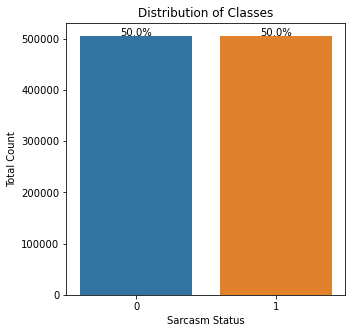

In [31]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='label',  data= dc)
ax.set(title = "Distribution of Classes", xlabel="Sarcasm Status", ylabel = "Total Count")
total = float(len(dc ))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()

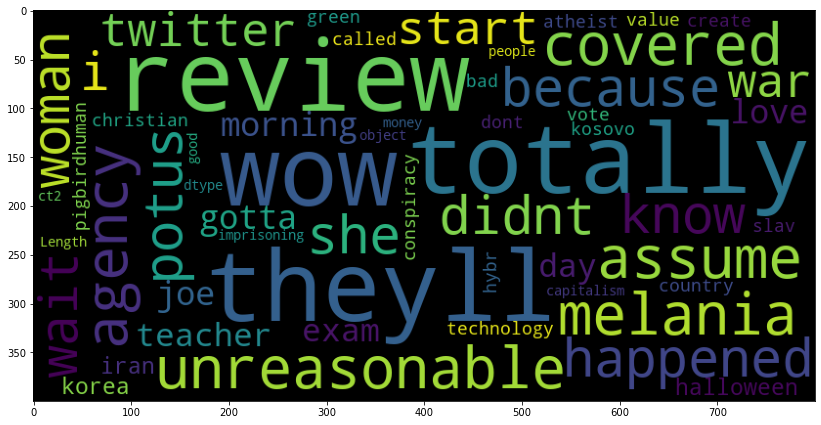

In [34]:
wordcloud1 = WordCloud(background_color='black', stopwords = stopwords,
                max_words = 400, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(14, 14))
wordcloud1.generate(str(dc.loc[dc['label'] == 1, 'ct2']))
plt.grid(b= False)
plt.imshow(wordcloud1);

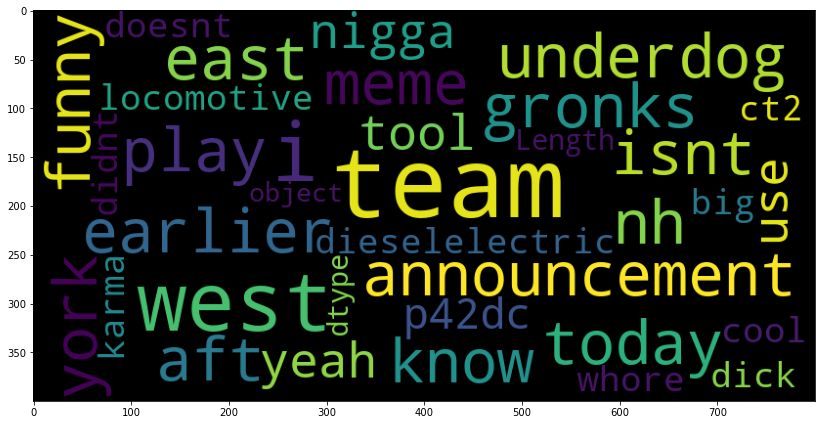

In [35]:
wordcloud0 = WordCloud(background_color='black', stopwords = stopwords,
                max_words = 400, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(14, 14))
wordcloud0.generate(str(dc.loc[dc['label'] == 0, 'ct2']))
plt.grid(b= False)
plt.imshow(wordcloud0);

In [36]:
print(wordcloud1.words_.keys())

dict_keys(['theyll', 'review', 'wow', 'totally', 'unreasonable', 'assume', 'agency', 'covered', 'melania', 'happened', 'because', 'she', 'didnt', 'know', 'woman', 'i', 'wait', 'potus', 'start', 'twitter', 'war', 'morning', 'joe', 'gotta', 'love', 'teacher', 'exam', 'day', 'halloween', 'iran', 'korea', 'technology', 'create', 'pigbirdhuman', 'hybr', 'dont', 'vote', 'green', 'atheist', 'conspiracy', 'christian', 'bad', 'slav', 'country', 'called', 'kosovo', 'value', 'capitalism', 'good', 'money', 'imprisoning', 'people', 'ct2', 'Length', 'dtype', 'object'])


In [37]:
dc['cmt1'] = dc['comment'].apply(len)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

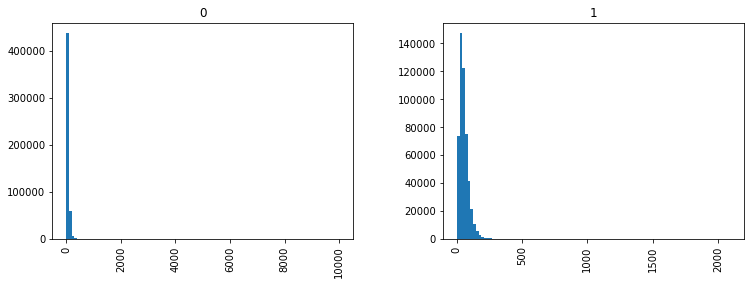

In [56]:
dc.hist(column='cmt1', by='label', bins=100,figsize=(12,4))

The length of the comments for sarcastic and non-sarcastic are skewed 

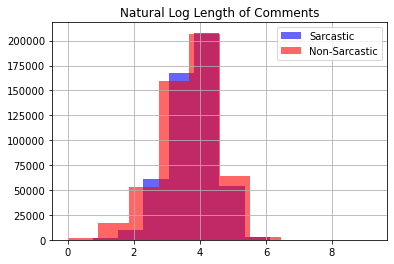

In [47]:
dc['log_comment'] = dc['comment'].apply(lambda text: np.log1p(len(text)))
dc[dc['label']==1]['log_comment'].hist(alpha=0.6,label='Sarcastic', color = 'blue')
dc[dc['label']==0]['log_comment'].hist(alpha=0.6,label='Non-Sarcastic', color = 'red')
plt.legend()
plt.title('Natural Log Length of Comments')
plt.show()

In [48]:
dc['subreddit'].value_counts()[:10]

AskReddit          65672
politics           39492
worldnews          26376
leagueoflegends    21034
pcmasterrace       18986
funny              17939
news               16889
pics               16152
todayilearned      14159
nfl                14148
Name: subreddit, dtype: int64

In [49]:
dc['processed_author'].value_counts()[:10]

biffingston       845
pokemonfetish     432
neondisease       424
shybidude89       404
ivsciguy          342
madnfla           318
mindlessrabble    302
canadagirl        300
chaoslab          252
sleazebagalert    251
Name: processed_author, dtype: int64

In [54]:
tr =[ 'AskReddit','politics', 'worldnews', 'leagueoflegends', 'pcmasterrace','funny','news','pics','todayilearned','nfl']

In [55]:
top_srs = pd.DataFrame()
top_srs['subreddit'] = tr
top_srs['sarcastic'] = np.nan
top_srs['natural'] = np.nan
top_srs['total'] = np.nan

In [57]:
for i in range(len(tr)):
    temp = dc.loc[dc['subreddit'] == top_srs.subreddit.iloc[i]]
    length = len(temp)
    count_sarcastic = len(temp.loc[temp['label'] == 1])
    top_srs.sarcastic.iloc[i] = count_sarcastic
    top_srs.natural.iloc[i] = length - count_sarcastic
    top_srs.total.iloc[i] = length

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


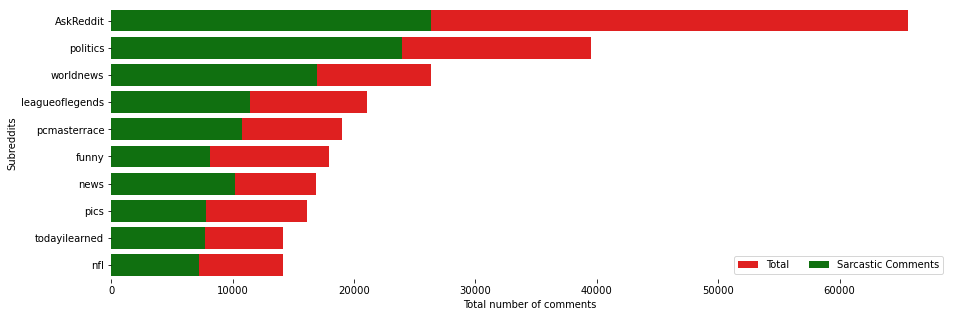

In [58]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x="total", y="subreddit", data=top_srs,
            label="Total", color="r")
sns.barplot(x="sarcastic", y="subreddit", data=top_srs,
            label="Sarcastic Comments", color="g")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Subreddits",
       xlabel="Total number of comments")
sns.despine(left=True, bottom=True)

In [59]:
dc.head(5)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,pc1,pc2,ct1,ct2,processed_author,processed_subreddit,cmt1,log_comment
0,0,nc and nh,Trumpbart,politics,0,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",yeah i argument point i prefer she live,yeah i argument point i prefer she lived,nh,nh,trumpbart,politics,9,2.302585
1,0,you do know west teams play against west teams...,Shbshb906,nba,0,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,blazer maverick west 5 6 seed carri good recor...,blazer mavericks west 5 6 seed carry good reco...,know west team play west team east team,know west team play west team east team,shbshb906,nba,73,4.304065
2,0,they were underdogs earlier today but since gr...,Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,favor win,favored win,underdog earlier today gronk announc afternoon...,underdog earlier today gronks announcement aft...,creepeth,nfl,117,4.770685
3,0,this meme isnt funny none of the new york nigg...,icebrotha,BlackPeopleTwitter,0,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,deadass kill buzz,deadass kill buzz,meme isnt funni york nigga,meme isnt funny york nigga,icebrotha,blackpeopletwitter,56,4.043051
4,0,i could use one of those tools,cush2push,MaddenUltimateTeam,0,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,yep confirm i tool use boy easportsmut,yep confirm i tool use boy easportsmut,i use tool,i use tool,cush2push,maddenultimateteam,30,3.433987


In [77]:
dc['ct2'].head(5).apply(text_process)

0                                                 [nh]
1     [know, west, team, play, west, team, east, team]
2    [underdog, earlier, today, gronks, announcemen...
3                     [meme, isnt, funny, york, nigga]
4                                       [i, use, tool]
Name: ct2, dtype: object

## Modelling

### Logistic Regression

In [80]:
logit = LogisticRegression(random_state= 42)

count_vec = CountVectorizer(analyzer=text_process)
bow_transformer = count_vec.fit(dc['ct2'])
mb = bow_transformer.transform(dc['ct2'])



tfidf_transformer = TfidfTransformer().fit(mb)
mf = tfidf_transformer.transform(mb)
x_train, x_test, y_train, y_test = train_test_split(mf, dc['label'], random_state=42)



logit.fit(x_train, y_train)
#print(X_tf_idf)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [81]:
predicted_class=logit.predict(x_test)
predicted_class_train=logit.predict(x_train)
test_probs = logit.predict_proba(x_test)
test_probs = test_probs[:, 1]
yhat = logit.predict(x_test)


In [82]:
train_accuracy = accuracy_score(y_train,predicted_class_train)
test_accuracy = accuracy_score(y_test,predicted_class)
print("Train accuracy score: ", train_accuracy)
print("Test accuracy score: ",test_accuracy )
print()

Train accuracy score:  0.7056399378411679
Test accuracy score:  0.6686216544578867



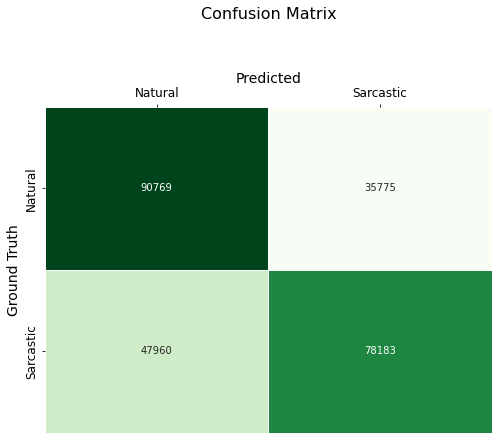

In [85]:
cm = confusion_matrix(y_test,predicted_class)

cm =  pd.DataFrame(cm, index=['Natural','Sarcastic'],columns=['Natural','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Ground Truth',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)


### Multinomial NB

In [87]:

count_vec = CountVectorizer(analyzer=text_process)
bow_transformer = count_vec.fit(dc['ct2'])
mb = bow_transformer.transform(dc['ct2'])
tfidf_transformer = TfidfTransformer().fit(mb)
mf = tfidf_transformer.transform(mb)


x_train, x_test, y_train, y_test = train_test_split(mf, dc['label'], random_state=42)


In [88]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(x_train, y_train)

MultinomialNB()

In [91]:
t = time()
y_pred = naive_bayes_classifier.predict(x_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')

test time:  0.028s
accuracy:   0.646
              precision    recall  f1-score   support

           0       0.65      0.63      0.64    126544
           1       0.64      0.66      0.65    126143

    accuracy                           0.65    252687
   macro avg       0.65      0.65      0.65    252687
weighted avg       0.65      0.65      0.65    252687

confusion matrix:
[[79523 47021]
 [42379 83764]]
------------------------------


DL MODELLING

In [92]:
dc.reset_index(drop = True, inplace = True)
corpus = [dc['ct2'][i] for i in range( len(dc))]

voc_size=5000

onehot_=[one_hot(words,voc_size)for words in corpus] 

max_sent_length = 20

embedded_docs=pad_sequences(onehot_,padding='pre',maxlen=max_sent_length)
    
embedding_vector_features=40

X_final=np.array(embedded_docs)
y_final=np.array(dc['label'])

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [93]:
lstm_model=Sequential()
lstm_model.add(Embedding(voc_size,embedding_vector_features,input_length=max_sent_length))
lstm_model.add(Dropout(0.3))
lstm_model.add(Bidirectional(LSTM(100)))
lstm_model.add(Dropout(0.3))
lstm_model.add(Flatten())
lstm_model.add(Dense(1,activation='sigmoid'))
lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [94]:
lstm_model.fit(X_train_lstm,y_train_lstm,validation_data=(X_test_lstm,y_test_lstm),epochs=20,batch_size=64)

Epoch 1/20
10582/10582 [==============================] - 300s 28ms/step - loss: 0.6238 - accuracy: 0.6447 - val_loss: 0.6146 - val_accuracy: 0.6547
Epoch 2/20
10582/10582 [==============================] - 303s 29ms/step - loss: 0.6096 - accuracy: 0.6604 - val_loss: 0.6095 - val_accuracy: 0.6585
Epoch 3/20
10582/10582 [==============================] - 326s 31ms/step - loss: 0.6022 - accuracy: 0.6677 - val_loss: 0.6083 - val_accuracy: 0.6596
Epoch 4/20
10582/10582 [==============================] - 339s 32ms/step - loss: 0.5967 - accuracy: 0.6724 - val_loss: 0.6089 - val_accuracy: 0.6584
Epoch 5/20
10582/10582 [==============================] - 337s 32ms/step - loss: 0.5922 - accuracy: 0.6763 - val_loss: 0.6119 - val_accuracy: 0.6594
Epoch 6/20
10582/10582 [==============================] - 341s 32ms/step - loss: 0.5890 - accuracy: 0.6793 - val_loss: 0.6115 - val_accuracy: 0.6580
Epoch 7/20
10582/10582 [==============================] - 345s 33ms/step - loss: 0.5851 - accuracy: 0.6821

In [95]:
y_test_pred=lstm_model.predict(X_test_lstm)
y_train_pred=lstm_model.predict(X_train_lstm)
test_acc_lstm = accuracy_score(y_test_lstm,y_test_pred.round())
train_acc_lstm = accuracy_score(y_train_lstm,y_train_pred.round())


print('Train accuracy of lstm: ',train_acc_lstm)

print('Test accuracy of lstm: ', test_acc_lstm)

Train accuracy of lstm:  0.7295388800042528
Test accuracy of lstm:  0.6522788460961906
